In [1]:
.libPaths("/pkg/R-4.1.0-0/lib/R/library")

In [2]:
.libPaths( c( "~/userLibrary" , .libPaths() ) )

In [3]:
library(DOSE)
library(ggplot2)
library(dplyr)
library(enrichplot)
library(clusterProfiler)
library("ggplot2")
library(org.Hs.eg.db)
library("readxl")



DOSE v3.18.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


clusterProfiler v4.0.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: Annota

In [5]:

#setwd("/Users/kibar/Desktop/QuasiIDRFinder")
my_data_metapredict <- read_excel("../MasterTable_canonicalHuman_qIDR.xlsx")
my_data_metapredict_top=head(my_data_metapredict,1000)

overlapped_names=my_data_metapredict_top[my_data_metapredict_top$overlap_metapredict == "yes", ]
x=data.frame(overlapped_names$gene_symbol,overlapped_names$`min(p-val)`)
x=x[!duplicated(x$overlapped_names.gene_symbol), ]
colnames(x)=c("Gene", "metric")
newdata_yes <- x[order(x$metric),] 



not_overlapped_names=my_data_metapredict_top[my_data_metapredict_top$overlap_metapredict == "no", ]
x=data.frame(not_overlapped_names$gene_symbol,not_overlapped_names$`min(p-val)`)
x=x[!duplicated(x$not_overlapped_names.gene_symbol), ]
colnames(x)=c("Gene", "metric")
newdata_no <- x[order(x$metric),] 

x=data.frame(my_data_metapredict_top$gene_symbol,my_data_metapredict_top$`min(p-val)`)
x=x[!duplicated(x$my_data_metapredict_top.gene_symbol), ]
colnames(x)=c("Gene", "metric")
newdata_all <- x[order(x$metric),] 
newdata_all$metric=-log10(newdata_all$metric)


newdata_no$metric=-log10(newdata_no$metric)

## Extract the foldchanges
foldchanges_no <- newdata_no$metric

## Name each fold change with the corresponding Entrez ID
names(foldchanges_no) <- newdata_no$Gene

foldchanges_no <- sort(foldchanges_no, decreasing = TRUE)



In [6]:


ego_no_bp <- enrichGO(gene          =  newdata_no$Gene,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
                keyType = 'SYMBOL')


ego_all_bp <- enrichGO(gene          =  newdata_all$Gene,
                      OrgDb         = org.Hs.eg.db,
                      ont           = "BP",
                      pAdjustMethod = "BH",
                      pvalueCutoff  = 0.01,
                      qvalueCutoff  = 0.05,
                      keyType = 'SYMBOL')

ego_all_mf <- enrichGO(gene          =  newdata_all$Gene,
                       OrgDb         = org.Hs.eg.db,
                       ont           = "MF",
                       pAdjustMethod = "BH",
                       pvalueCutoff  = 0.01,
                       qvalueCutoff  = 0.05,
                       keyType = 'SYMBOL')

ego_all_cc <- enrichGO(gene          =  newdata_all$Gene,
                       OrgDb         = org.Hs.eg.db,
                       ont           = "CC",
                       pAdjustMethod = "BH",
                       pvalueCutoff  = 0.01,
                       qvalueCutoff  = 0.05,
                       keyType = 'SYMBOL')

ego_yes_bp <- enrichGO(gene          = newdata_yes$Gene,
                   OrgDb         = org.Hs.eg.db,
                   ont           = "BP",
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 0.01,
                   qvalueCutoff  = 0.05,
                   keyType = 'SYMBOL')

ego_no_mf <- enrichGO(gene          =  newdata_no$Gene,
                      OrgDb         = org.Hs.eg.db,
                      ont           = "MF",
                      pAdjustMethod = "BH",
                      pvalueCutoff  = 0.01,
                      qvalueCutoff  = 0.05,
                      keyType = 'SYMBOL')



ego_yes_mf <- enrichGO(gene          = newdata_yes$Gene,
                       OrgDb         = org.Hs.eg.db,
                       ont           = "MF",
                       pAdjustMethod = "BH",
                       pvalueCutoff  = 0.01,
                       qvalueCutoff  = 0.05,
                       keyType = 'SYMBOL')

ego_no_cc <- enrichGO(gene          =  newdata_no$Gene,
                      OrgDb         = org.Hs.eg.db,
                      ont           = "CC",
                      pAdjustMethod = "BH",
                      pvalueCutoff  = 0.01,
                      qvalueCutoff  = 0.05,
                      keyType = 'SYMBOL')



ego_yes_cc <- enrichGO(gene          = newdata_yes$Gene,
                       OrgDb         = org.Hs.eg.db,
                       ont           = "CC",
                       pAdjustMethod = "BH",
                       pvalueCutoff  = 0.01,
                       qvalueCutoff  = 0.05,
                       keyType = 'SYMBOL')


In [10]:


ego_results_yes_bp <- ego_yes_bp@result
ego_results_no_bp <- ego_no_bp@result


ego_results_yes_mf <- ego_yes_mf@result
ego_results_no_mf <- ego_no_mf@result


ego_results_yes_cc <- ego_yes_cc@result
ego_results_no_cc <- ego_no_cc@result


ego_results_all_bp <- ego_all_bp@result
ego_results_all_bp$source=rep("BP",nrow(ego_results_all_bp))

ego_results_all_cc <- ego_all_cc@result
ego_results_all_cc$source=rep("CC",nrow(ego_results_all_cc))

ego_results_all_mf <- ego_all_mf@result
ego_results_all_mf$source=rep("MF",nrow(ego_results_all_mf))



In [12]:


sim_keys=head(intersect(ego_results_yes_bp$ID,ego_results_no_bp$ID),7)
sim_keys_1=head(intersect(ego_results_no_bp$ID,ego_results_yes_bp$ID),7)
merged_go_1=rbind(ego_results_yes_bp[ego_results_yes_bp$ID %in% c(sim_keys,sim_keys_1), ],ego_results_no_bp[ego_results_no_bp$ID %in%  c(sim_keys,sim_keys_1), ])
merged_go_1$source=rep("BP",nrow(merged_go_1))
merged_go_1$condition=rep(c("overlap","no-overlap"),each=nrow(ego_results_yes_bp[ego_results_yes_bp$ID %in% c(sim_keys,sim_keys_1), ]))



In [14]:
sim_keys_2=head(intersect(ego_results_yes_mf$ID,ego_results_no_mf$ID),7)
sim_keys_3=head(intersect(ego_results_no_mf$ID,ego_results_yes_mf$ID),7)



In [15]:
merged_go_2=rbind(ego_results_yes_mf[ego_results_yes_mf$ID %in% c(sim_keys_2,sim_keys_3), ],ego_results_no_mf[ego_results_no_mf$ID %in%  c(sim_keys_2,sim_keys_3), ])


In [22]:
merged_go_2$source=rep("MF",nrow(merged_go_2))


In [23]:
merged_go_2$condition=rep(c("overlap","no-overlap"),each=nrow(ego_results_no_mf[ego_results_no_mf$ID %in%  c(sim_keys_2,sim_keys_3), ]))

In [25]:

sim_keys_4=head(intersect(ego_results_yes_cc$ID,ego_results_no_cc$ID),5)
sim_keys_5=head(intersect(ego_results_no_cc$ID,ego_results_yes_cc$ID),5)
merged_go_3=rbind(ego_results_yes_cc[ego_results_yes_cc$ID %in% c(sim_keys_4,sim_keys_5), ],ego_results_no_cc[ego_results_no_cc$ID %in%  c(sim_keys_4,sim_keys_5), ])
merged_go_3$source=rep("CC",nrow(merged_go_3))
merged_go_3$condition=rep(c("overlap","no-overlap"),each=nrow(ego_results_yes_cc[ego_results_yes_cc$ID %in% c(sim_keys_4,sim_keys_5), ]))

In [26]:

final=rbind(merged_go_1,merged_go_2,merged_go_3)


all_df_ego=rbind(ego_results_all_bp,ego_results_all_cc,ego_results_all_mf)
all_df_ego=all_df_ego[all_df_ego$ID %in% final$ID, ]
all_df_ego$condition=rep("all",nrow(all_df_ego))


final_dataset=rbind(final,all_df_ego)

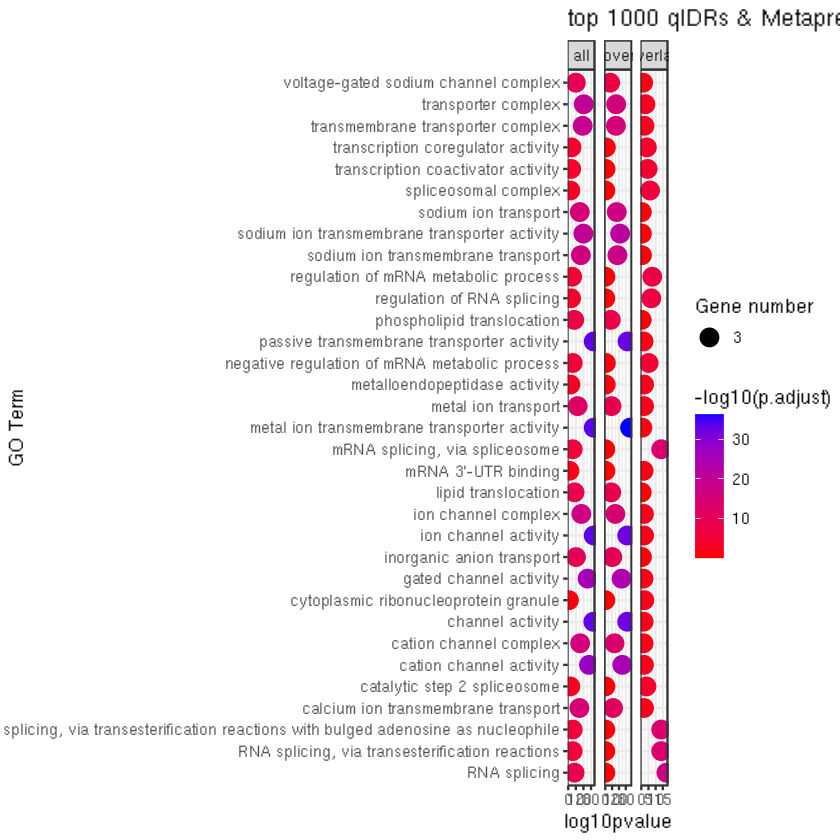

In [27]:
ggplot(final_dataset, aes(x=-log10(p.adjust), y=Description, size = Count ,color=-log10(p.adjust))) +geom_point(aes(size=3))  + facet_grid(. ~ condition, scales="free") + labs( size="Gene number", x="log10pvalue", y="GO Term", title="top 1000 qIDRs & Metapredict") +scale_color_gradient(low = "red", high = "blue")+theme_bw()

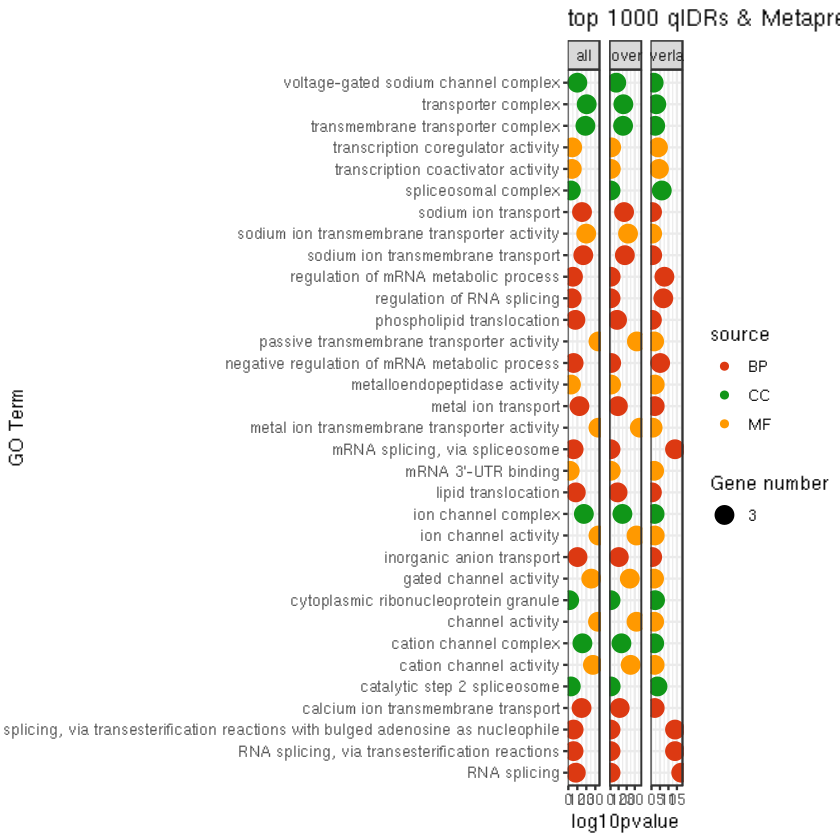

In [28]:
Color = c("#dc3912", "#109618", "#ff9900")

ggplot(final_dataset, aes(x=-log10(p.adjust), y=Description, size = Count ,color=source)) + geom_point(aes(size=3))  + facet_grid(. ~ condition, scales="free") + labs( size="Gene number", x="log10pvalue", y="GO Term", title="top 1000 qIDRs & Metapredict") + scale_y_discrete(limits = rev(levels(final_dataset$Description))) +scale_color_manual(values=Color)+theme_bw()

